# Redes Neuronales Artificiales & Deep Learning

## Objetivos de este curso

- **Conocer, entender y aplicar algunos modelos clásicos de Redes Neuronales Artificiales**, y algunas habilidades útiles en la práctica.
- **Conocer los conceptos básicos del Aprendizaje Profundo y aplicar las herramientas para desarrollar aplicaciones de machine learning**.
- **Aprender a utilizar los modelos de Deep Learning de Keras con la biblioteca Scikit-Learn de Python**, y evaluar los modelos de Keras utilizando la validación cruzada en scikit-learn (la biblioteca scikit-learn es la biblioteca más popular para Machine Learning en Python).
- **Identificar el tipo de red neuronal más adecuado para cada problema**, y las limitaciones de cada arquitectura.
- **Presentar a Python como herramienta de simulación de Redes Neuronales Artificiales**, y el ambiente de trabajo del curso!!!

## Schedule:

- Comenzando...
- Introducción
- Perceptrón
- Redes neuronales estáticas
- Redes recurrentes y mapas auto-organizados
- Memorias asociativas y Redes de funcion de base radial
- Introducción a las bibliotecas de aprendizaje profundo
- Modelos de regresión con Keras
- Modelos de clasificación con Keras
- Redes neuronales convolucionales
- Redes neuronales recurrentes

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/deep-learning/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

## La neurona artificial: El Perceptrón

### Perceptrón: Modelo de McCulloch y Pitts (1943)

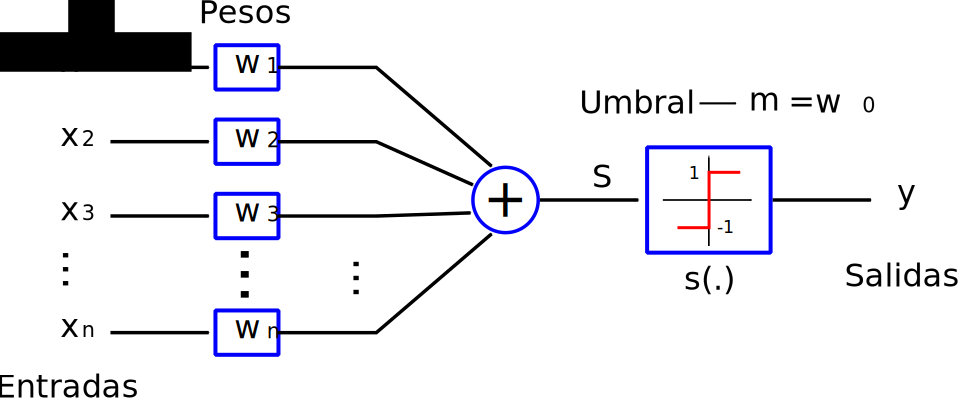

In [3]:
from IPython.display import SVG
SVG(valid_path + 'intro_fig7.svg')

La neurona se dispara si la suma excede el valor umbral $\mu$.

$$S={\sum}_{i=1}^{n} w_{i}x_{i}+\mu$$

$$y=\sigma\left({\sum}_{i=1}^{n} w_{i}x_{i}+\mu\right)=\sigma\left({\sum}_{i=0}^{n} w_{i}x_{i}\right)\; \; \; \; \; \; \;/\:x_{0}=1$$

$$\sigma\left(\theta\right)=\begin{cases}
\begin{array}{c}
-1\quad sii\quad\theta<0\\
1\quad sii\quad\theta>0
\end{array}\end{cases}$$

$\sigma\left(\cdot\right)$ se llama *función de activación*, y además del limitador duro se utiliza el umbral lógico, la función logística y la tangente hiperbólica.

In [4]:
SVG(valid_path + 'intro_fig7b.svg')

### Adaline: Adaptive Linear Element, Widrow-Hoff (1985)

Estructuralmente es similar al perceptrón, pero su función de transferencia es lineal, no un limitador duro, por lo que la salida puede tomar cualquier valor. Al igual que el perceptrón solo puede resolver problemas linealmente separables (es diferenciable).

In [5]:
SVG(valid_path + 'intro_fig8.svg')

$$S=w_{0}x_{0}+{\sum}_{i=1}^{n} w_{i}x_{i} = {\sum}_{i=0}^{n} w_{i}x_{i}$$

$$y=\sigma\left({\sum}_{i=0}^{n} w_{i}x_{i}\right)\; \; \; \; \; \; \; \;/\:x_{0}=1$$

$$\sigma\left(\theta\right)= a\,\theta \; \; \;/\:a=constante$$

Al igual que el perceptrón solo sirve para determinar aproximaciones lineales (solo dos clases separables linealmente).

### Filtro adaptativo y combinador lineal adaptativo

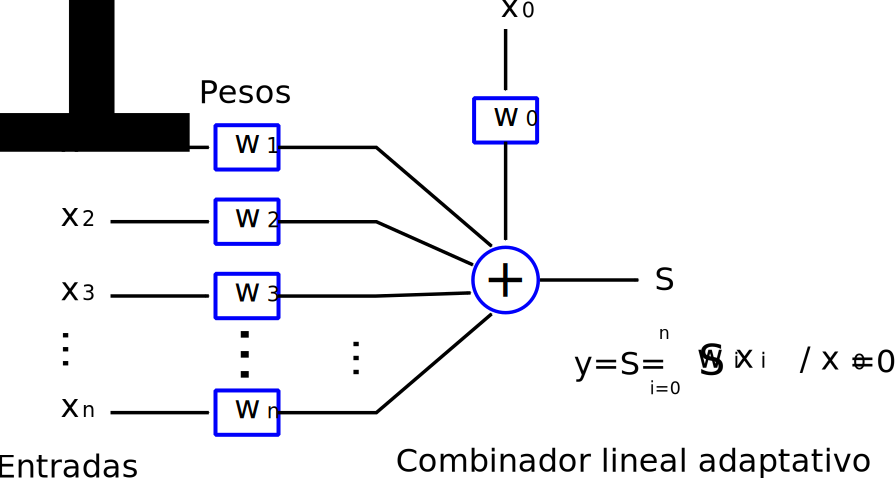

In [6]:
SVG(valid_path + 'intro_fig9.svg')

El combinador lineal permite el diseño de filtros adaptativos. Es fundamental para el procesamiento adaptativo de señales, y en este tipo particular de aplicación la neurona tiene una única señal de entrada a la cual se le toman muestras a lo largo del tiempo.

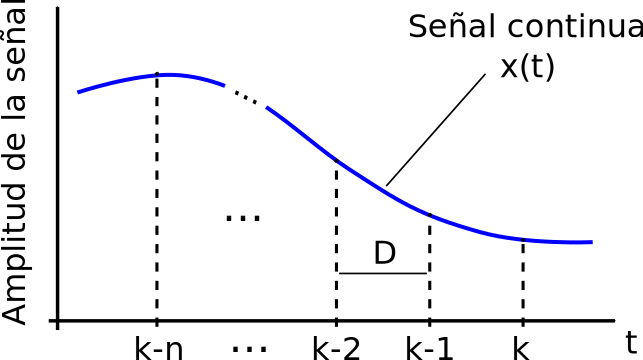

In [7]:
SVG(valid_path + 'intro_fig10.svg')

Una cadena de retrazos $\varDelta$ permite obtener muestras anteriores de la señal.

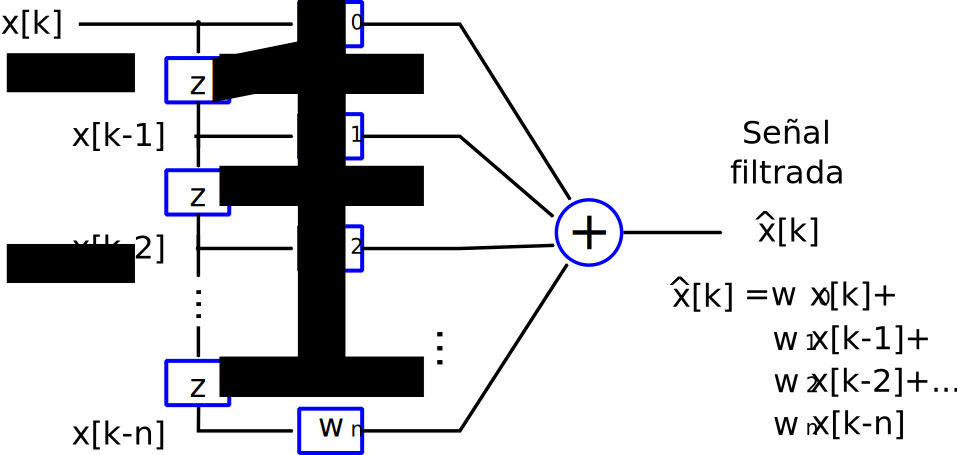

In [8]:
SVG(valid_path + 'intro_fig11.svg')

Este filtro funciona también para series de tiempo.

### Para concluir!!
Las neuronas biológicas se diferencian de las neuronas artificiales en:
- Las neuronas biológicas realizan una suma no lineal de sus entradas.
- La neurona biológica produce una secuencia de pulsos, no un nivel a la salida. Una rata promedio de disparo de la neurona biológica es 1000 pulsos por segundo.

### Red neuronal de una capa

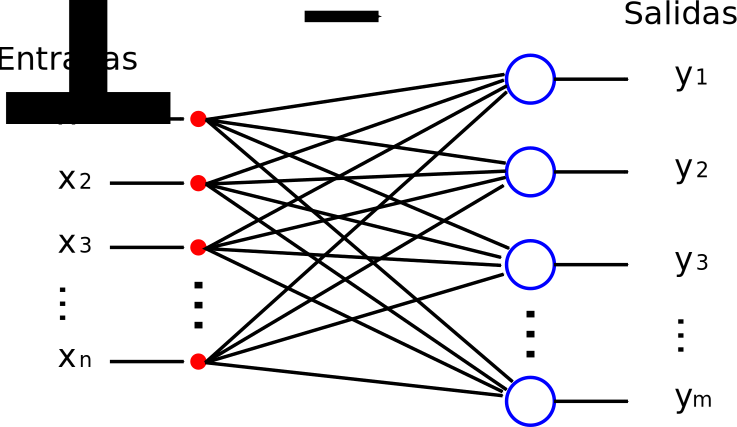

In [ ]:
SVG(valid_path + 'intro_fig12.svg')

Red neuronal con nodos de entrada y una capa de neuronas de salida. Cada circulo de la capa de neuronas de salida corresponde a una neurona tipo perceptrón.

### Funciones separables linealmente

Las RNA de una sola capa tienen el problema de que solo pueden identificar clases o categorías si ellas pueden ser separables linealmente. Para explicar esto considere la red neuronal de una capa con solo dos variables de entrada $\left(x_{1},x_{2}\right)$ y una variable de salida $y$.

In [ ]:
SVG(valid_path + 'intro_fig13.svg')

El umbral $\mu$ se reemplaza por el peso $w_{0}$ con su señal de entrada en 1, es decir, $\mu=w_{0}$. La salida lineal $s$ de esta neurona es:

$$s=w_{0}x_{0}+w_{1}x_{1}+w_{2}x_{2}= {\sum}_{i=0}^{2} w_{i}x_{i}$$

Donde $x_{0}=1$.

La salida no lineal de la neurona, $y$, esta determinada por $s$ y la función de activación que alimenta $\sigma\left(\cdot\right)$, en este caso un limitador duro con solo dos posibles valores de salida: +1 y -1. Por lo tanto, si $s\geq0$ la salida es $y=+1$, y si $s<0$ la salida es $y=-1$.

$$y=\begin{cases}
\begin{array}{c}
+1\\
-1
\end{array} & \begin{array}{c}
\textrm{si}\; w_{1}x_{1}+w_{2}x_{2}+\textrm{umbral}\geq0\\
\textrm{si}\; w_{1}x_{1}+w_{2}x_{2}+\textrm{umbral}<0
\end{array}\end{cases}$$

El objetivo es entrenar la neurona para que duplique (identifique) el comportamiento de la función. Éste entrenamiento consiste en ajustar el valor de los pesos $w_i$, lo cual se debe hacer a fin de reproducir correctamente la salida $y$ para cualquier patrón de entrada $\boldsymbol{x}_{k}$.

**En términos de hiperplanos, se dice que la neurona identifica la función si existe un hiperplano capaz de distribuir el plano en dos regiones (o categorías), de tal forma que en una región queden todos los patrones que produzcan la categoría de salida $y=+1$, y en la otra región todos los patrones que produzcan la categoría de salida $y=-1$. Esto restringe el conjunto de funciones que puede identificar la neurona a aquellos que logren satisfacer la ecuación de salida no lineal para $y$.**

Esta función de activación, que separa las dos regiones, define una línea recta en el plano (un plano por que en este ejemplo solo se tienen dos variables de entrada):

$$w_{1}x_{1}+w_{2}x_{2}+\textrm{umbral}=0$$

Si ésta recta existe, es decir, existen valores para $w_1$ y $w_2$ tal que la recta separa el plano en dos regiones, cada una conteniendo una categoría de salida, y dado que el umbral es una constante del problema, entonces la ecuación anterior define una recta en el plano de la forma:

$$x_{2}=-\frac{w_{1}}{w_{2}}x_{1}-\frac{\textrm{umbral}}{w_{2}}$$

In [ ]:
SVG(valid_path + 'intro_fig14.svg')

Ahora utilicemos esta RNA de una capa y dos entrada y una salida para identificar una dinamica o función. En este ejemplo utilizaremos como primer caso la compuerta logica OR. Las parejas de entrenamiento de esta función quedarían de esta forma:

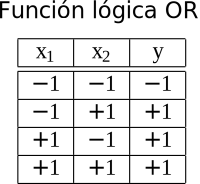

In [ ]:
SVG(valid_path + 'intro_fig15.svg')

Para entender mejor esta comportamiento, es normal representar el espacio de estados de la salida de acuerdo al comportamiento de los patrones de entrada.

In [ ]:
SVG(valid_path + 'intro_fig16.svg')

Analicemos ahora el problema de identificar la función lógica XOR. La tabla siguiente detalla el comportamiento de esta función lógica. Nuevamente, es posible representar en una gráfica el espacio de estados de la salida de acuerdo al comportamiento de los patrones de entrada. Sin embargo, a diferencia del caso de la compuerta OR, para esta función no es posible definir al menos una recta que separe los dos posibles estados de la salida.

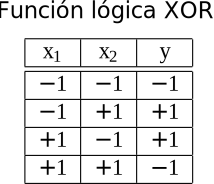

In [ ]:
SVG(valid_path + 'intro_fig17.svg')

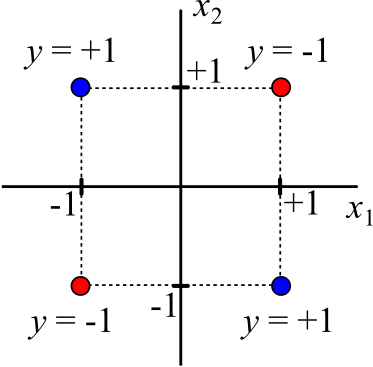

In [ ]:
SVG(valid_path + 'intro_fig18.svg')

Ahora bien, determinar si un problema es linealmente separable o no es bastante fácil e intuitivo cuando la salida esta enmarcada en un espacio de estados de solo dos dimensiones, como es el caso de las funciones lógicas OR y XOR. Sin embargo, esta visualización ya no es tan sencilla cuando la salida genera un espacio de estados de tres categorías o mas. En estos casos, se deben plantear condiciones de desigualdad que permitan comprobar la separabilidad lineal. Esto se puede hacer a partir de la ecuación de salida del perceptrón. Si no hay contradicción en las desigualdades, el problema es separable linealmente.

## Entrenamiento de la neurona artificial

Supervisado, requieren patrones de Entrada/Salida y no supervisado, cuando la red establece su propia organización a partir de los datos de entrada.

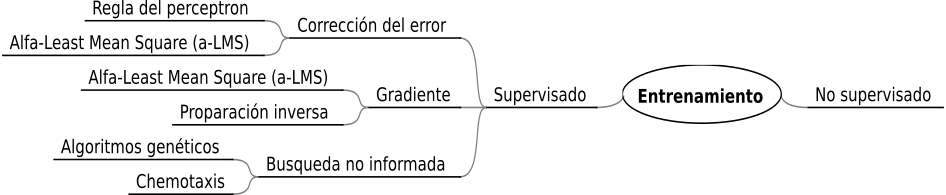

In [ ]:
SVG(valid_path + 'intro_fig19.svg')

### Representación vectorial

$$\begin{array}{c}
\boldsymbol{X}=\left[\begin{array}{c}
x_{0}\\
x_{1}\\
x_{2}\\
\vdots\\
x_{n}
\end{array}\right]\:,\quad\quad\\
\textrm{Vector entradas}
\end{array}\quad\quad\begin{array}{c}
\boldsymbol{W}=\left[\begin{array}{c}
w_{0}\\
w_{1}\\
w_{2}\\
\vdots\\
w_{n}
\end{array}\right]\:,\quad\quad\\
\textrm{Vector pesos}
\end{array}\quad\quad\begin{array}{c}
\boldsymbol{X_{k}}=\left[\begin{array}{c}
x_{0k}\\
x_{1k}\\
x_{2k}\\
\vdots\\
x_{nk}
\end{array}\right]\:,\quad\quad\\
\textrm{Vector entradas, patron }k
\end{array}\quad\quad$$

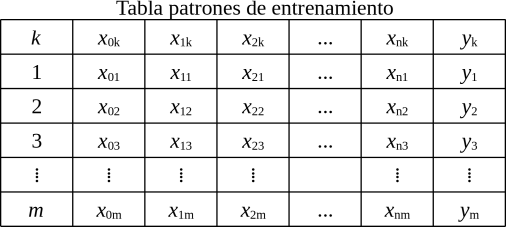

In [ ]:
SVG(valid_path + 'intro_fig19b.svg')

### Entrenamiento por corrección del error

- **Alfa-Least Mean Square $\alpha$-LMS (Mínimo Cuadrado Medio)**

Se utiliza cuando la neurona no tiene función de activación (combinador lineal adaptativo). Modifica el vector de pesos en la dirección del patrón de entrada.

In [ ]:
SVG(valid_path + 'intro_fig20.svg')

El vector de pesos $\boldsymbol{W}_k$ se modifica en dirección del patrón $\boldsymbol{X}_k$, y produce el nuevo vector de pesos $\boldsymbol{W}_{k+1}$. Se ajusta un patrón a la vez, y un barrido de la tabla de datos corresponde a una iteración.

$$\boldsymbol{w}_{k+1}=\boldsymbol{w}_{k}+\alpha e_{k}\frac{\boldsymbol{x}_{k}}{\left\Vert \boldsymbol{x}_{k}\right\Vert ^{2}}$$

$$y_{k}=\boldsymbol{w}_{k}^{T}\boldsymbol{x}_{k}$$

$$e_{k}=d_{k}-\boldsymbol{w}_{k}^{T}\boldsymbol{x}_{k}$$

La ganancia $\alpha$ determina la importancia de cada nuevo vector $\boldsymbol{X}_k$, también se conoce como rata de aceleración.

La velocidad de convergencia depende de la correlación entre patrones Entrada/Salida. A mayor correlación menor velocidad. Cuando los patrones estan fuertemente correlacionados el combinador lineal maneja información redundante y su aprendizaje es lento (el $\Delta\boldsymbol{W}_k$ no aporta información).

- **Regla del Perceptron**

Para limitador duro. Patrones de entrada separables linealmente.

$$\boldsymbol{w}_{k+1}=\boldsymbol{w}_{k}+\alpha\hat{e}_{k}x_{k}$$

$$\hat{e}_{k}=d_{k}-y_{k}=d_{k}-f\left(s_{k}\right)$$

### Entrenamiento por gradiente

Altera los pesos minimizando el error cuadrático medio.

$$\boldsymbol{w}_{k+1}=\boldsymbol{w}_{k}+\alpha\left(-\nabla_{k}\right)$$

- **Alfa-Least Mean Square $\alpha$-LMS**

Sin función de activación. $\nabla_{k}$ es el gradiente de la función de error respecto a los pesos.

$$e_{k}^{2}=\left(d_{k}-\boldsymbol{w}_{k}^{T}\boldsymbol{x}_{k}\right)^{2}$$

$$\boldsymbol{w}_{k+1}=\boldsymbol{w}_{k}+2\alpha e_{k}\boldsymbol{x}_{k}$$

- **Propagación inversa**

Requiere que la función de activación $f\left(s_{k}\right)$ sea derivable. El error no lineal es:

$$\tilde{e}_{k}=d_{k}-f\left(s_{k}\right)=d_{k}-f\left(\boldsymbol{w}_{k}^{T}\boldsymbol{x}_{k}\right)$$

Por tanto, el gradiente del error cuadrático es:

$$\nabla_{k}=-2\tilde{e}_{k}f'\left(s_{k}\right)\boldsymbol{x}_{k}$$

Y la actualización de los pesos se hace con:

$$w_{k+1}=w_{k}+2\alpha\tilde{e}_{k}f'\left(s_{k}\right)\boldsymbol{x}_{k}$$

Si la función de activación es tangente hiperbólica:

$$f\left(s_{k}\right)=tanh\left(s_{k}\right)\Rightarrow f'\left(s_{k}\right)=1-y_{k}^{2}$$

Si la función de activación es la función logística:

$$f\left(s_{k}\right)=\frac{1}{1+e^{s_{k}}}\Rightarrow f'\left(s_{k}\right)=y_{k}\left(1-y_{k}\right)$$

### Posible algoritmo de entrenamiento

1. Defino de forma aleatoria un primer vector $\boldsymbol{W}_k$.
2. Con este vector propago la neurona (o red de una capa) con el primer patrón de Entrada/Salida y calculo el error $\boldsymbol{e}_{k}$. Almaceno el resultado.
3. Con este error hago el primer ajuste al vector de pesos para calcular $\boldsymbol{W}_{k+1}$ utilizando, por ejemplo, la norma euclidiana.
4. Calculo el nuevo error del parametro utilizando $\boldsymbol{W}_{k+1}$.
4. Repito los pasos (2) y (3) para todos los demás patrones de la tabla, en cada caso almaceno el error. Cada barrido de la tabla corresponde a una iteración.
5. Con los errores almacenados a partir de $\boldsymbol{W}_{k+1}$ calculo el valor medio del error.
6. Evalúo si el error medio es suficientemente pequeño. Si es así, entonces el vector $\boldsymbol{W}_k$ es una solución (no el vector $\boldsymbol{W}_{k+1}$, a este aún no se le evalúa el error). En la practica es muy difícil que se logre el objetivo del error en la primera iteración, es decir, lo normal es iniciar una nueva iteración desde el paso (2) con el nuevo vector de pesos $\boldsymbol{W}_{k+1}$.

## Taller

1. ¿Qué tipos de problemas puede resolver un perceptrón? Elabore.
2. Ajuste o proponga un nuevo algoritmo para el entrenamiento de un perceptrón de una capa.
3. Diseñar y entrenar un combinador lineal adaptativo para realizar la regresion:

$$\hat{x}_{k}=a_{1}x_{k-1}+a_{2}x_{k-2}$$

Escoja un valor de retrazo $\varDelta$ adecuado al comportamiento de la curva y utilice los datos de la tabla para generar el máximo posible de patrones de entrenamiento.

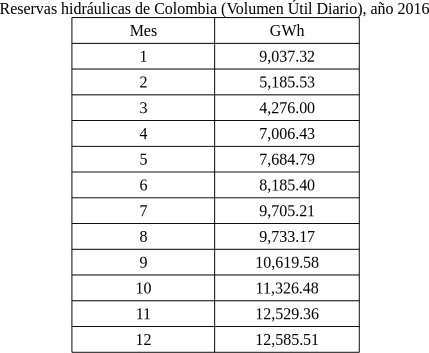

In [ ]:
SVG(valid_path + 'intro_fig21.svg')

4. Entrenar una neurona artificial con función de activación limitador duro para aprender la tabla de la función lógica OR. Utilice la regla del perceptrón con $\alpha=0.1$. El vector inicial de pesos es:

$$\boldsymbol{W}_{0}^{T}=\left[\begin{array}{ccc}
0.1 & 0.2 & 0.3\end{array}\right]$$

5. Proponer un problema que involucre la utilización de una neurona artificial para su solución. Elabore.